In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)


   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [6]:
features = df[df.columns[:-1]]
features

,Height,Weight,Age
0,170,65,30
1,165,59,25
2,180,75,35
3,175,68,28
4,160,55,22
5,172,70,32
6,168,62,27
7,177,74,33
8,162,58,24
9,158,54,21


In [20]:
y = df['Gender']

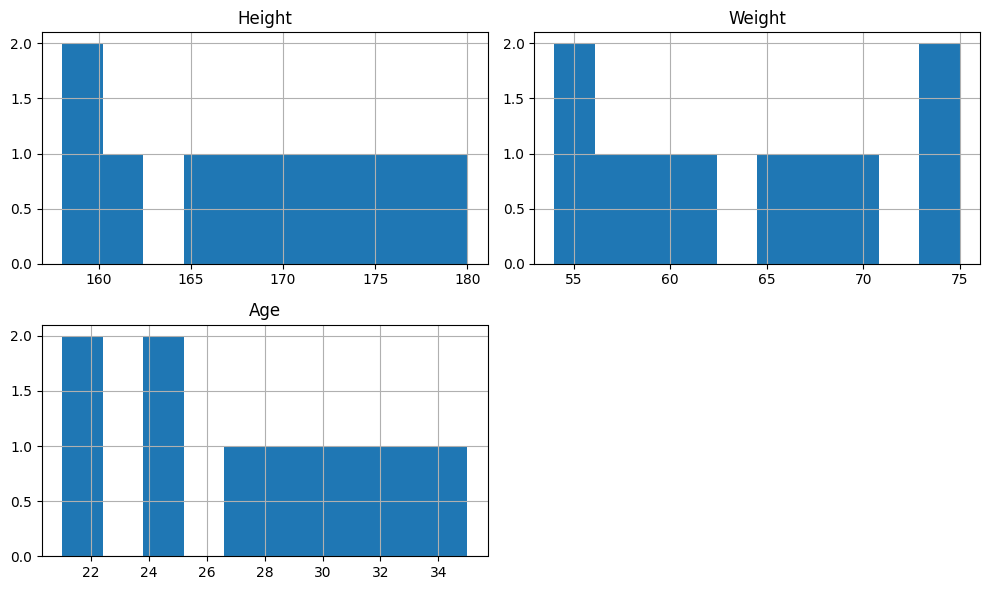

In [7]:
features.hist(bins=10, figsize=(10, 6), layout=(2, 2))
plt.tight_layout()
plt.show()

# standardization

In [9]:
scalar = StandardScaler()
features_scaled = scalar.fit_transform(features)

In [12]:
features_scaled_df = pd.DataFrame(features_scaled,columns=features.columns)

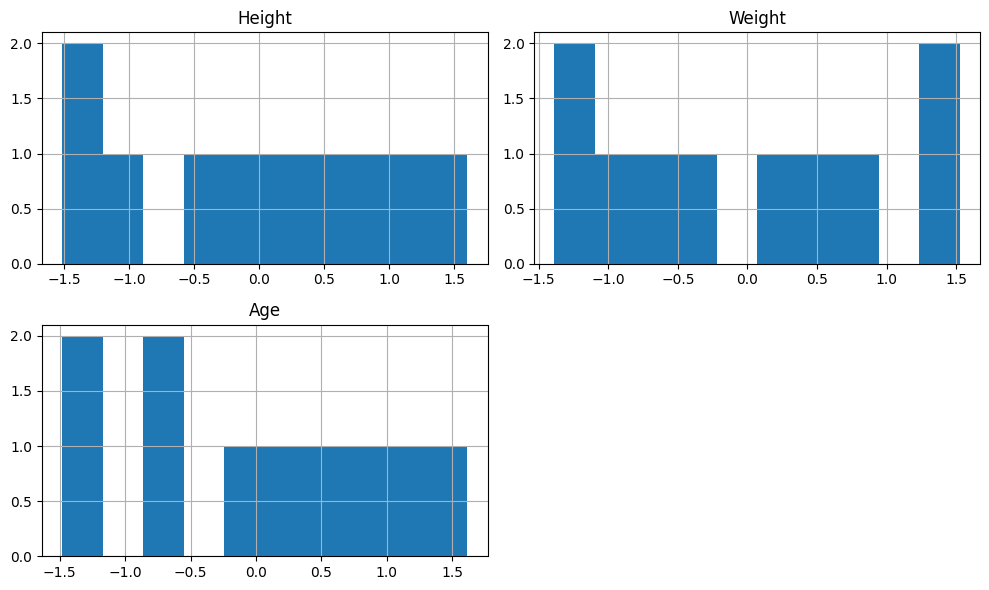

In [13]:
features_scaled_df.hist(bins=10, figsize=(10, 6), layout=(2, 2))
plt.tight_layout()
plt.show()

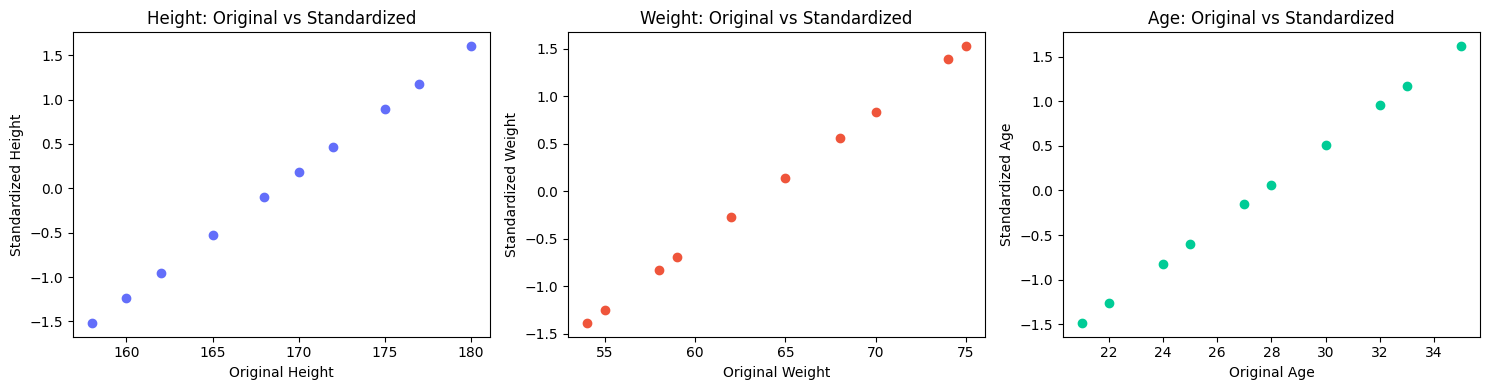

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(features.columns):
    axes[idx].hist(features[col], bins=10, alpha=0.7, label='Original', color=colors[idx])
    axes[idx].hist(features_scaled_df[col], bins=10, alpha=0.7, label='Standardized', color='gray')
    axes[idx].set_title(f"{col}: Original vs Standardized")
    axes[idx].set_xlabel(f"Original {col}")
    axes[idx].set_ylabel(f"Standardized {col}")
    axes[idx].legend()

plt.tight_layout()
plt.show()


# Covariance MAtrix

In [18]:
cov_matrix = features_scaled_df.cov()
print(cov_matrix)

          Height    Weight       Age
Height  1.111111  1.089427  1.052758
Weight  1.089427  1.111111  1.084580
Age     1.052758  1.084580  1.111111


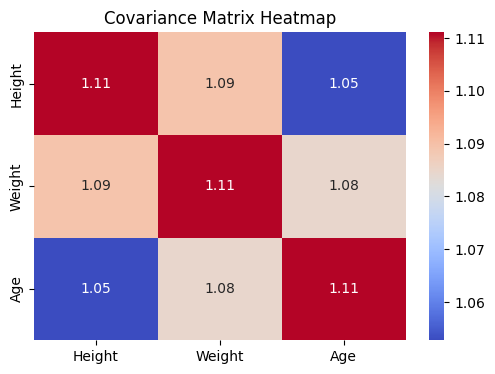

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

# PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)



In [22]:
X_pca

array([[ 0.47934953, -0.24005867],
       [-1.04854122,  0.0462082 ],
       [ 2.73763841, -0.01704297],
       [ 0.87462551,  0.58608547],
       [-2.16068418,  0.02240454],
       [ 1.30013241, -0.33690873],
       [-0.30743041,  0.03219976],
       [ 2.15777883,  0.01054754],
       [-1.50115252, -0.08802759],
       [-2.53171635, -0.01540757]])

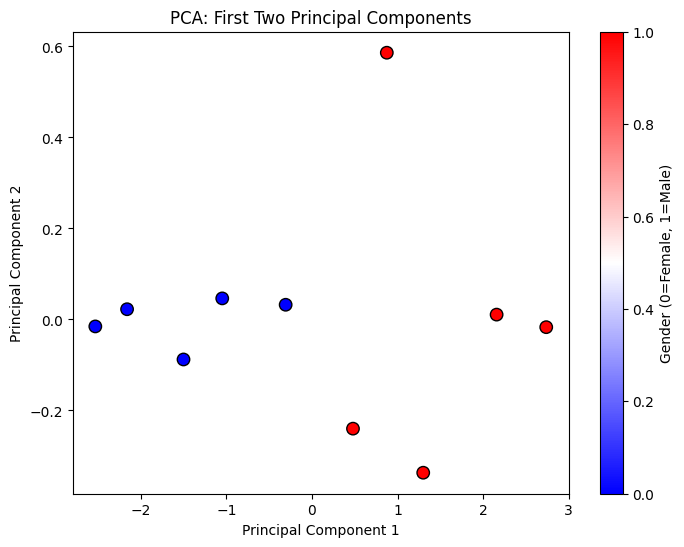

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Gender (0=Female, 1=Male)')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

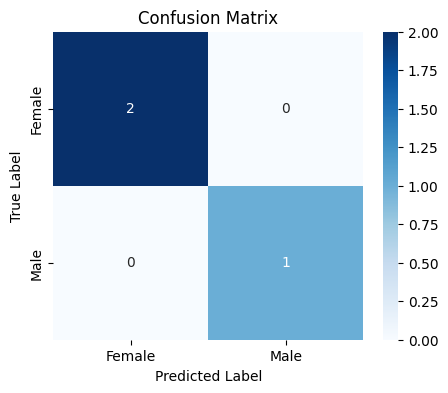

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

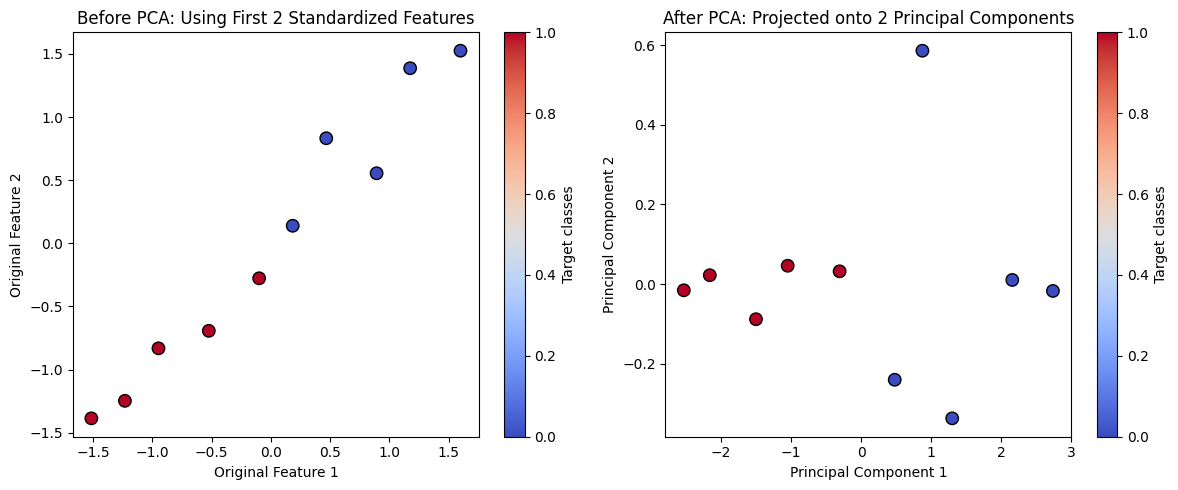

In [27]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()